In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [8]:
ds = xr.open_mfdataset('HiRes_Hourly_Surf/ERA5_HiRes_Hourly_tp_2000_*.nc', chunks={'longitude':720})

In [10]:
avg = ds.tp.mean(dim='time').compute()

In [11]:
avg = avg

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)>
dask.array<mean_agg-aggregate, shape=(721, 1440), dtype=float32, chunksize=(721, 720), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

In [ ]:
xr.open_dataset

In [29]:
ds = xr.open_mfdataset('ERA5_LowRes_Hourly_Energy_2021_*.nc')

vnames = {'p74.162': 'nw_geopotential_flux',
          'p70.162': 'nw_heat_flux',
          'p68.162': 'nw_kinetic_flux',
          'p76.162': 'nw_total_energy_flux'}
ds = ds.rename(vnames)

ds['nw_latent_flux'] = ds['nw_total_energy_flux'] - ds['nw_geopotential_flux'] - ds['nw_heat_flux'] - ds['nw_kinetic_flux']

In [31]:
ds.nbytes / 1024**3

15.100260976701975

In [32]:
ds['nw_latent_flux'] = ds['nw_total_energy_flux'] - ds['nw_geopotential_flux'] - ds['nw_heat_flux'] - ds['nw_kinetic_flux']

In [46]:
dsmt = ds.mean(dim='time')

In [47]:
dsmt = dsmt.compute()

In [48]:
dsmtl = dsmt.mean(dim='longitude')

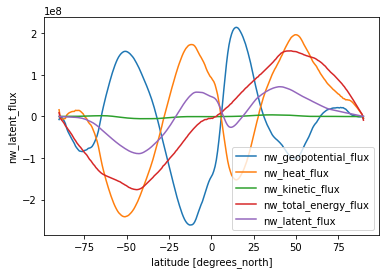

In [49]:
for i, v in enumerate(dsmtl):
    dsmtl[v].plot(label=v, color=f'C{i}');
plt.legend();

In [55]:
dsmta = dsmt - dsmtl

In [58]:
dsmta['nw_latent_flux']

<xarray.DataArray 'nw_latent_flux' (latitude: 241, longitude: 480)>
array([[ 6.2500000e-02,  6.2500000e-02,  6.2500000e-02, ...,
         6.2500000e-02,  6.2500000e-02,  6.2500000e-02],
       [-2.4579575e+06, -2.3682438e+06, -2.3273325e+06, ...,
        -2.6332090e+06, -2.5865608e+06, -2.4934610e+06],
       [-2.5495620e+06, -2.5325605e+06, -2.5276685e+06, ...,
        -2.8199190e+06, -2.7363580e+06, -2.6781960e+06],
       ...,
       [ 2.9861658e+06,  2.9313222e+06,  2.8699892e+06, ...,
         3.1851718e+06,  3.0953950e+06,  3.0215808e+06],
       [ 3.3875432e+06,  3.3119595e+06,  3.2239032e+06, ...,
         3.5108918e+06,  3.5069075e+06,  3.4224678e+06],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0

In [50]:
dsmla = (ds - ds.mean(dim='longitude')).mean(dim='time')
dsmla = dsmla.compute()

In [53]:
dsmla = dsmla.mean(dim='longitude')

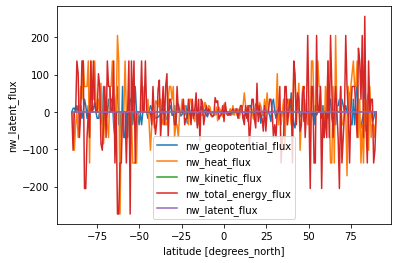

In [54]:
for i, v in enumerate(dsmla):
    dsmla[v].plot(label=v, color=f'C{i}');
plt.legend();

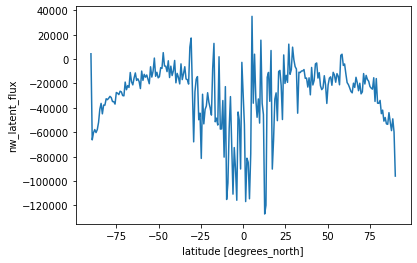

In [21]:
(dsm[v] - dsm_lr[v]).plot();

In [22]:
dsm

<xarray.Dataset>
Dimensions:               (latitude: 721)
Coordinates:
  * latitude              (latitude) float32 90.0 89.75 89.5 ... -89.75 -90.0
Data variables:
    nw_geopotential_flux  (latitude) float32 -8.773e+06 2.283e+06 ... 3.79e+07
    nw_heat_flux          (latitude) float32 1.246e+07 -6.335e+04 ... 1.392e+08
    nw_kinetic_flux       (latitude) float32 -2.652e+04 -7.025e+04 ... 1.672e+05
    nw_total_energy_flux  (latitude) float32 3.502e+06 2.294e+06 ... 1.777e+08
    nw_latent_flux        (latitude) float32 -1.582e+05 1.448e+05 ... 4.055e+05

In [23]:
dsm_lr

<xarray.Dataset>
Dimensions:               (latitude: 241)
Coordinates:
  * latitude              (latitude) float32 90.0 89.25 88.5 ... -89.25 -90.0
Data variables:
    nw_geopotential_flux  (latitude) float32 -8.776e+06 2.589e+06 ... 3.789e+07
    nw_heat_flux          (latitude) float32 1.277e+07 1.97e+06 ... 1.396e+08
    nw_kinetic_flux       (latitude) float32 -2.739e+04 -1.976e+05 ... 1.672e+05
    nw_total_energy_flux  (latitude) float32 3.904e+06 4.777e+06 ... 1.781e+08
    nw_latent_flux        (latitude) float32 -6.224e+04 4.155e+05 ... 4.012e+05